In [1]:
# all modules necessary for this nb
import os
import sys
import pickle

import numpy as np
import pylab as pl
import scipy.stats as sstats

# setting parameters for default matplotlib plots
%matplotlib inline

In [2]:
pl.style.use('fabiostyle')
# needs to find the library of functions
sys.path.append('../../code/')  # to be replaced!

import utils as ut
import plots as pt

In [3]:
# NOTEBOOK_NAME = NOTEBOOK_NAME.split('/')[-1][:-6]
NOTEBOOK_NAME = 'decoding_across_combined_trial_subset_FIGURES'

In [4]:
from pickleshare import PickleShareDB

autorestore_folder = os.path.join(os.getcwd(), 'autorestore', NOTEBOOK_NAME)
db = PickleShareDB(autorestore_folder)
import sys
from workspace import *
import IPython
ip = IPython.get_ipython()

# this will restore all the saved variables. ignore the errors listed.
load_workspace(ip, db)

# use `save_worspace(db)` to save variables at the end

In [5]:
from itertools import product
def load_all_animals_vars(varname, animal_list, pilot_list=None, notebook='preprocessing'):
    all_of_them = {}
    for ani in animal_list:
        folder = '../%s/notebooks/autorestore/%s/' % (ani, notebook)
        all_of_them.update({ani: ut.load_variable(varname, folder)})
    return all_of_them

In [63]:
from matplotlib.lines import Line2D
def add_significance(ax, array1, array2, x1, x2, y, ticksize=0.02, sig_func=None, thresholds=(0.05, 0.01, 0.001)):
    if sig_func is None:
        sig_func = lambda x, y: sstats.mannwhitneyu(x, y, alternative='two-sided')
    p = sig_func(array1, array2)[-1]
    sig_value = sig_func(array1, array2)[0]
    deltay = np.diff(ax.axis()[-2:])*ticksize
    line = Line2D([x1, x1, x2, x2], [y-deltay, y, y, y-deltay], lw=.5, color='k', clip_on=False)
    ax.add_line(line)
    ax.text(np.mean([x1, x2]), y+1,
            'n.s.' if p>thresholds[0] else
            '*' if p>thresholds[1] else
            '**' if p>thresholds[2] else
            '***',
            ha='center', fontsize=4)
    return sig_value, p

In [64]:
def sig_vs_chance(ax, array1, chance, x1, y1, loops=loops, ticksize=0.02, sig_func=None, thresholds=(0.05, 0.01, 0.001),colors='k'):
    if sig_func is None:
        sig_func = lambda x: sstats.wilcoxon(x)
        subtracted = [x-chance for x in array1]
        p = sig_func(subtracted)[-1]
        sig_value = sig_func(subtracted)[0]
    elif sig_func is ttest:
        sig_func = lambda x, y: sstats.ttest_1samp(x,y)
        p = sig_func(array1,chance)[-1]
        sig_value = sig_func(array1,chance)[0]
    ax.text(x1, y1,
            'n.s.' if p>thresholds[0] else
            '*' if p>thresholds[1] else
            '**' if p>thresholds[2] else
            '***',
            ha='center', fontsize=4, color=colors)
    return sig_value, p

In [6]:
sessions = 'pre', 'post', 'ext1', 'ext2', 'renew'

In [7]:
all_comparisons = 'prepost_patterns_pre',\
'prepost_patterns_post',\
'preext1_patterns_pre',\
'preext1_patterns_ext1',\
'preext2_patterns_pre',\
'preext2_patterns_ext2',\
'prerenew_patterns_pre',\
'prerenew_patterns_renew',\
'postext1_patterns_post',\
'postext1_patterns_ext1',\
'postext2_patterns_post',\
'postext2_patterns_ext2',\
'postrenew_patterns_post',\
'postrenew_patterns_renew',\
'ext1ext2_patterns_ext1',\
'ext1ext2_patterns_ext2',\
'ext1renew_patterns_ext1',\
'ext1renew_patterns_renew',\
'ext2renew_patterns_renew',\
'ext2renew_patterns_ext2'

In [8]:
start_trials = [0,80]    # which trial do you want to start with?
end_trials = [40,120]     # which u wanna end with?
for s,e in zip(start_trials,end_trials):
    exec("S%s_E%s_testy_vhpc = ut.load_variable('S%s_E%s_testy',\
        '../notebooks/autorestore/decoding_across_combined_trial_subset_vhpc/')"%(s,e,s,e))
    exec("S%s_E%s_testy_dhpc = ut.load_variable('S%s_E%s_testy',\
        '../notebooks/autorestore/decoding_across_combined_trial_subset_dhpc_w35and36/')"%(s,e,s,e))

In [13]:
for x,i in zip(S0_E40_testy_dhpc.keys(),range(len(S0_E40_testy_dhpc.keys()))):
    print i,x

0 postext1_ext1_ext1
1 ext1ext2_ext2_ext2
2 prepost_pre_post
3 ext1renew_ext1_ext1
4 prerenew_pre_renew
5 prepost_post_post
6 prerenew_pre_pre
7 ext1ext2_ext1_ext2
8 ext1ext2_ext1_ext1
9 postrenew_renew_renew
10 ext1renew_renew_renew
11 preext2_pre_pre
12 ext1renew_ext1_renew
13 postext1_post_ext1
14 prepost_pre_pre
15 preext2_ext2_ext2
16 prerenew_renew_renew
17 ext2renew_ext2_ext2
18 ext2renew_renew_ext2
19 postrenew_post_post
20 preext1_pre_ext1
21 preext1_pre_pre
22 postext1_post_post
23 postext2_ext2_ext2
24 preext1_ext1_ext1
25 postext2_post_post
26 ext2renew_renew_renew
27 postext2_post_ext2
28 preext2_pre_ext2
29 postrenew_post_renew


In [22]:
across_comps = [2,20,28,4,13,27,29,7,12,18]

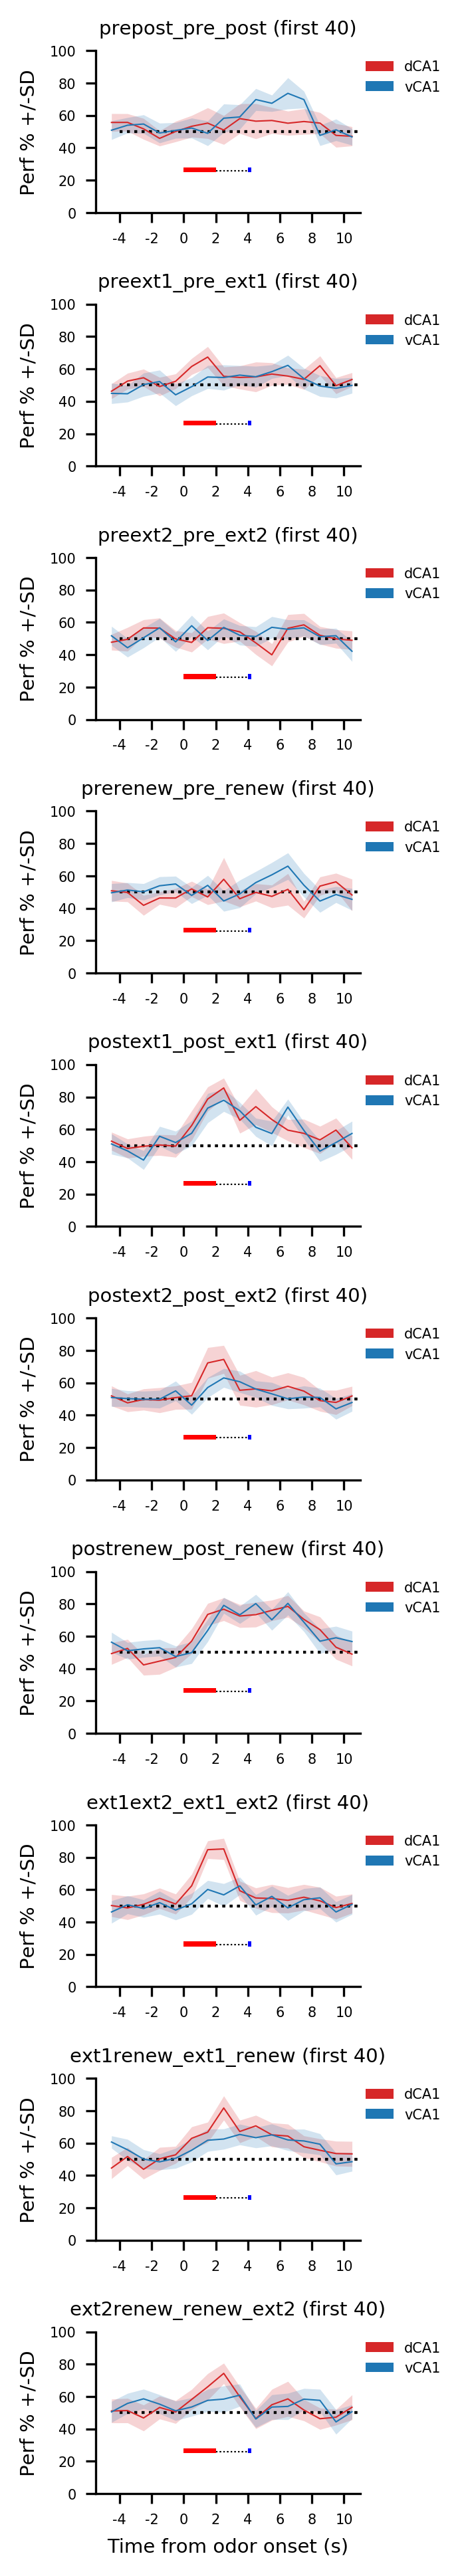

In [91]:
from matplotlib.patches import Patch


fig, ax = pl.subplots(len(across_comps),1, figsize=(2, 13))

for i in range(len(across_comps)):      
    for x,c in zip(['dhpc','vhpc'],['tab:red','tab:blue']):
        ax[i].plot([(t-4.5) for t in range(16)], [eval("np.mean(S0_E40_testy_%s[S0_E40_testy_%s.keys()[across_comps[i]]][t][t])"%(x,x))*100 for t in range(16)],
            color=c,label=S0_E40_testy_dhpc.keys()[across_comps[i]])
        m = np.array([eval("np.mean(S0_E40_testy_%s[S0_E40_testy_%s.keys()[across_comps[i]]][t][t])"%(x,x))*100 for t in range(16)])
        s = np.array([eval("np.std(S0_E40_testy_%s[S0_E40_testy_%s.keys()[across_comps[i]]][t][t])"%(x,x))*100 for t in range(16)])
        ax[i].fill_between([(t-4.5) for t in range(16)],m-s,m+s,alpha=0.2,color=c,linewidth=0)
        ax[i].set_ylim(0, 100)
        ax[i].set_xlim(-5.5, 11)
        ax[i].set_xticks(np.arange(-4,11, 2))
        ax[i].set_xticklabels(np.arange(-4,11, 2))
        ax[i].hlines(50, -4,11, color='k', lw=1, linestyles='dotted')
        ax[i].set_ylabel('Perf % +/-SD')
        pt.plot_period_bar(ax[i], 25, start_end=(0, 2), color='r', delta_y=3)
        # pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
        pt.plot_period_bar(ax[i], 25, start_end=(4, 4.2), color='b', delta_y=3)
        ax[i].hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
        ax[i].set_title(S0_E40_testy_dhpc.keys()[across_comps[i]]+" (first 40)")
        ax[i].legend([Patch(facecolor='tab:red'),Patch(facecolor='tab:blue')],['dCA1','vCA1'],loc=(1,.7),frameon=False)
ax[i].set_xlabel('Time from odor onset (s)')




fig.tight_layout(pad=2)

fig.savefig('../img/%s_gmin_all_first40.jpg'%NOTEBOOK_NAME)

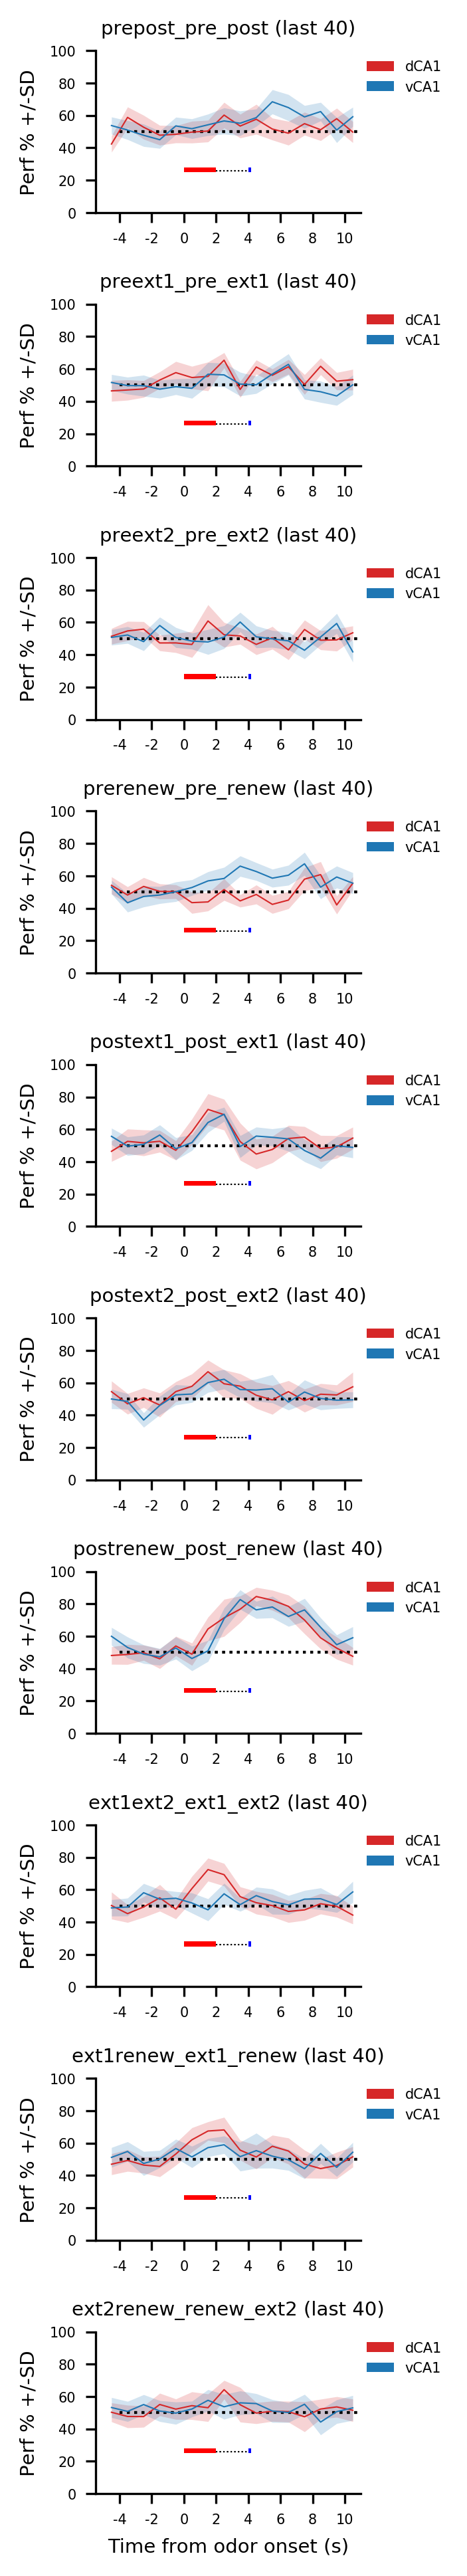

In [90]:
from matplotlib.patches import Patch


fig, ax = pl.subplots(len(across_comps),1, figsize=(2, 13))

for i in range(len(across_comps)):      
    for x,c in zip(['dhpc','vhpc'],['tab:red','tab:blue']):
        ax[i].plot([(t-4.5) for t in range(16)], [eval("np.mean(S80_E120_testy_%s[S80_E120_testy_%s.keys()[across_comps[i]]][t][t])"%(x,x))*100 for t in range(16)],
            color=c,label=S80_E120_testy_dhpc.keys()[across_comps[i]])
        m = np.array([eval("np.mean(S80_E120_testy_%s[S80_E120_testy_%s.keys()[across_comps[i]]][t][t])"%(x,x))*100 for t in range(16)])
        s = np.array([eval("np.std(S80_E120_testy_%s[S80_E120_testy_%s.keys()[across_comps[i]]][t][t])"%(x,x))*100 for t in range(16)])
        ax[i].fill_between([(t-4.5) for t in range(16)],m-s,m+s,alpha=0.2,color=c,linewidth=0)
        ax[i].set_ylim(0, 100)
        ax[i].set_xlim(-5.5, 11)
        ax[i].set_xticks(np.arange(-4,11, 2))
        ax[i].set_xticklabels(np.arange(-4,11, 2))
        ax[i].hlines(50, -4,11, color='k', lw=1, linestyles='dotted')
        ax[i].set_ylabel('Perf % +/-SD')
        pt.plot_period_bar(ax[i], 25, start_end=(0, 2), color='r', delta_y=3)
        # pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
        pt.plot_period_bar(ax[i], 25, start_end=(4, 4.2), color='b', delta_y=3)
        ax[i].hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
        ax[i].set_title(S80_E120_testy_dhpc.keys()[across_comps[i]]+" (last 40)")
        ax[i].legend([Patch(facecolor='tab:red'),Patch(facecolor='tab:blue')],['dCA1','vCA1'],loc=(1,.7),frameon=False)
ax[i].set_xlabel('Time from odor onset (s)')




fig.tight_layout(pad=2)

fig.savefig('../img/%s_all_last40.jpg'%NOTEBOOK_NAME)

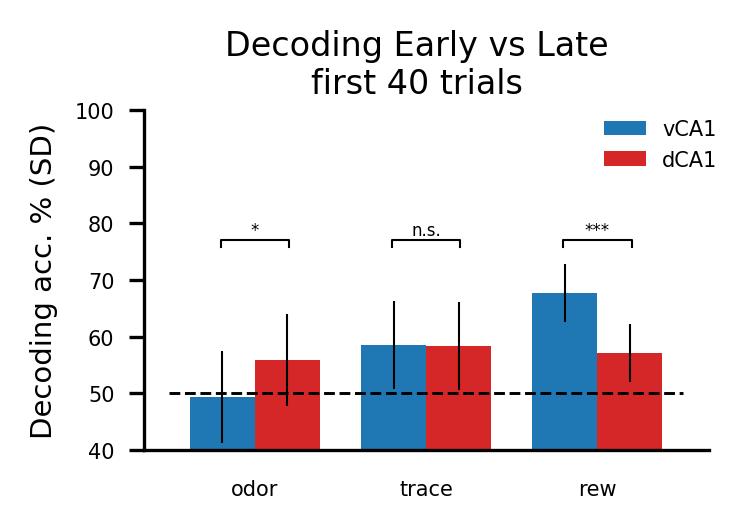

In [75]:
from matplotlib.patches import Patch
width = 0.38  # the width of the bars
loops = 15
v={}
d={}
#to_plot = [1,2,4,5]
fig, ax = pl.subplots()
for tb,i in zip([6,8,10],range(3)):
    v[sess] = np.array(np.std(S0_E40_testy_vhpc['prepost_pre_post'][tb][tb][:loops])*100)
    ax.bar(i - width/2, np.mean(S0_E40_testy_vhpc['prepost_pre_post'][tb][tb][:loops])*100, width, color='tab:blue',yerr=v[sess])
    d[sess] = np.array(np.std(S0_E40_testy_dhpc['prepost_pre_post'][tb][tb][:loops])*100)
    ax.bar(i + width/2, np.mean(S0_E40_testy_dhpc['prepost_pre_post'][tb][tb][:loops])*100, width, color='tab:red',yerr=v[sess])
ax.hlines(50,-.5,2.5, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Decoding acc. % (SD)')
#ax.set_title('Decoding During CS')
ax.set_ylim(40,100)
ax.set_xticks([0,1,2])
ax.set_xticklabels(['odor','trace','rew'])
ax.legend([Patch(facecolor='tab:blue'),Patch(facecolor='tab:red')],['vCA1','dCA1'],loc=(.8,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
for tb,i in zip([6,8,10],range(3)):
    pvs.append(add_significance(ax,S0_E40_testy_vhpc['prepost_pre_post'][tb][tb].mean(1)[:loops],
                                S0_E40_testy_dhpc['prepost_pre_post'][tb][tb].mean(1)[:loops],
                                -.2+i,0.2+i,77))
#        #max(np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess],
#        #    np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess])+6))
#    pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_vhpc[sess][:loops],.5,-.2+i,
#               np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
#    pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_dhpc[sess][:loops],.5, .2+i,
#               np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('Decoding Early vs Late\nfirst 40 trials',y=1.06,fontsize=8)

fig.savefig('../img/%s_gmin_bars_CS_no_expo.pdf'%NOTEBOOK_NAME)

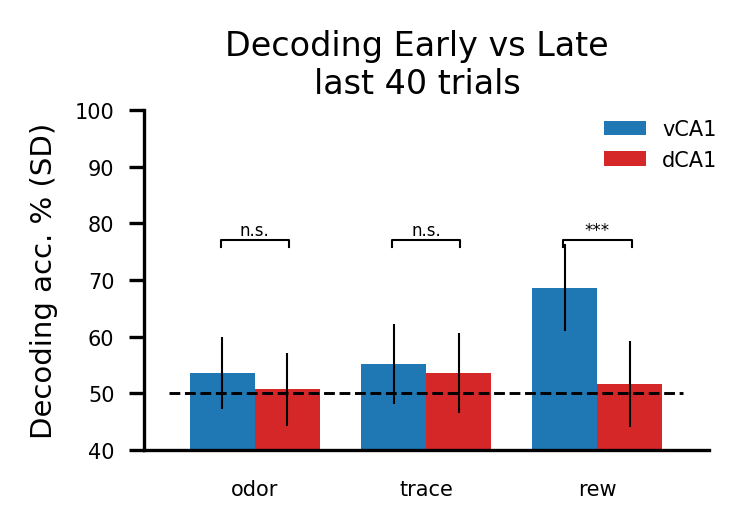

In [76]:
from matplotlib.patches import Patch
width = 0.38  # the width of the bars
loops = 15
v={}
d={}
#to_plot = [1,2,4,5]
fig, ax = pl.subplots()
for tb,i in zip([6,8,10],range(3)):
    v[sess] = np.array(np.std(S80_E120_testy_vhpc['prepost_pre_post'][tb][tb][:loops])*100)
    ax.bar(i - width/2, np.mean(S80_E120_testy_vhpc['prepost_pre_post'][tb][tb][:loops])*100, width, color='tab:blue',yerr=v[sess])
    d[sess] = np.array(np.std(S80_E120_testy_dhpc['prepost_pre_post'][tb][tb][:loops])*100)
    ax.bar(i + width/2, np.mean(S80_E120_testy_dhpc['prepost_pre_post'][tb][tb][:loops])*100, width, color='tab:red',yerr=v[sess])
ax.hlines(50,-.5,2.5, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Decoding acc. % (SD)')
#ax.set_title('Decoding During CS')
ax.set_ylim(40,100)
ax.set_xticks([0,1,2])
ax.set_xticklabels(['odor','trace','rew'])
ax.legend([Patch(facecolor='tab:blue'),Patch(facecolor='tab:red')],['vCA1','dCA1'],loc=(.8,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
for tb,i in zip([6,8,10],range(3)):
    pvs.append(add_significance(ax,S80_E120_testy_vhpc['prepost_pre_post'][tb][tb].mean(1)[:loops],
                                S80_E120_testy_dhpc['prepost_pre_post'][tb][tb].mean(1)[:loops],
                                -.2+i,0.2+i,77))
#        #max(np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess],
#        #    np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess])+6))
#    pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_vhpc[sess][:loops],.5,-.2+i,
#               np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
#    pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_dhpc[sess][:loops],.5, .2+i,
#               np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('Decoding Early vs Late\nlast 40 trials',y=1.06,fontsize=8)

fig.savefig('../img/%s_gmin_bars_CS_no_expo.pdf'%NOTEBOOK_NAME)

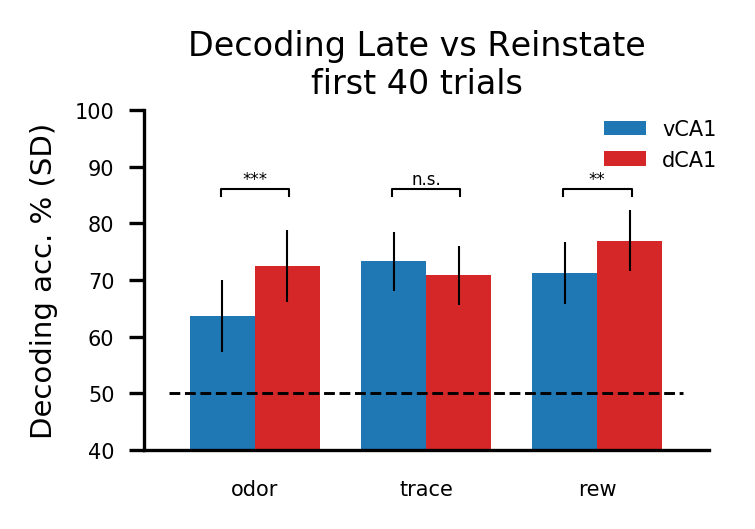

In [83]:
from matplotlib.patches import Patch
width = 0.38  # the width of the bars
loops = 15
v={}
d={}
#to_plot = [1,2,4,5]
fig, ax = pl.subplots()
for tb,i in zip([6,8,10],range(3)):
    v[sess] = np.array(np.std(S0_E40_testy_vhpc['postrenew_post_renew'][tb][tb][:loops])*100)
    ax.bar(i - width/2, np.mean(S0_E40_testy_vhpc['postrenew_post_renew'][tb][tb][:loops])*100, width, color='tab:blue',yerr=v[sess])
    d[sess] = np.array(np.std(S0_E40_testy_dhpc['postrenew_post_renew'][tb][tb][:loops])*100)
    ax.bar(i + width/2, np.mean(S0_E40_testy_dhpc['postrenew_post_renew'][tb][tb][:loops])*100, width, color='tab:red',yerr=v[sess])
ax.hlines(50,-.5,2.5, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Decoding acc. % (SD)')
#ax.set_title('Decoding During CS')
ax.set_ylim(40,100)
ax.set_xticks([0,1,2])
ax.set_xticklabels(['odor','trace','rew'])
ax.legend([Patch(facecolor='tab:blue'),Patch(facecolor='tab:red')],['vCA1','dCA1'],loc=(.8,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
for tb,i in zip([6,8,10],range(3)):
    pvs.append(add_significance(ax,S0_E40_testy_vhpc['postrenew_post_renew'][tb][tb].mean(1)[:loops],
                                S0_E40_testy_dhpc['postrenew_post_renew'][tb][tb].mean(1)[:loops],
                                -.2+i,0.2+i,86))
#        #max(np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess],
#        #    np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess])+6))
#    pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_vhpc[sess][:loops],.5,-.2+i,
#               np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
#    pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_dhpc[sess][:loops],.5, .2+i,
#               np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('Decoding Late vs Reinstate\nfirst 40 trials',y=1.06,fontsize=8)

fig.savefig('../img/%s_gmin_bars_CS_no_expo.pdf'%NOTEBOOK_NAME)

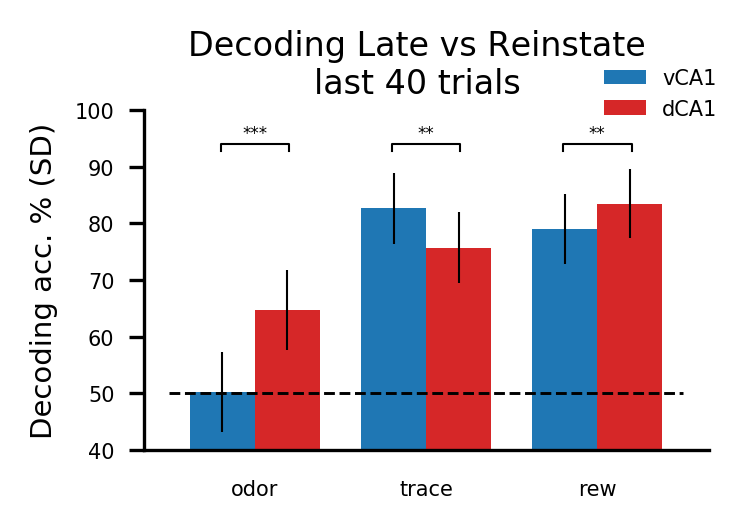

In [89]:
from matplotlib.patches import Patch
width = 0.38  # the width of the bars
loops = 15
v={}
d={}
#to_plot = [1,2,4,5]
fig, ax = pl.subplots()
for tb,i in zip([6,8,10],range(3)):
    v[sess] = np.array(np.std(S80_E120_testy_vhpc['postrenew_post_renew'][tb][tb][:loops])*100)
    ax.bar(i - width/2, np.mean(S80_E120_testy_vhpc['postrenew_post_renew'][tb][tb][:loops])*100, width, color='tab:blue',yerr=v[sess])
    d[sess] = np.array(np.std(S80_E120_testy_dhpc['postrenew_post_renew'][tb][tb][:loops])*100)
    ax.bar(i + width/2, np.mean(S80_E120_testy_dhpc['postrenew_post_renew'][tb][tb][:loops])*100, width, color='tab:red',yerr=v[sess])
ax.hlines(50,-.5,2.5, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Decoding acc. % (SD)')
#ax.set_title('Decoding During CS')
ax.set_ylim(40,100)
ax.set_xticks([0,1,2])
ax.set_xticklabels(['odor','trace','rew'])
ax.legend([Patch(facecolor='tab:blue'),Patch(facecolor='tab:red')],['vCA1','dCA1'],loc=(.8,.95),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
for tb,i in zip([6,8,10],range(3)):
    pvs.append(add_significance(ax,S80_E120_testy_vhpc['postrenew_post_renew'][tb][tb].mean(1)[:loops],
                                S80_E120_testy_dhpc['postrenew_post_renew'][tb][tb].mean(1)[:loops],
                                -.2+i,0.2+i,94))
#        #max(np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess],
#        #    np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess])+6))
#    pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_vhpc[sess][:loops],.5,-.2+i,
#               np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
#    pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_dhpc[sess][:loops],.5, .2+i,
#               np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('Decoding Late vs Reinstate\nlast 40 trials',y=1.06,fontsize=8)

fig.savefig('../img/%s_gmin_bars_CS_no_expo.pdf'%NOTEBOOK_NAME)

In [72]:
S0_E40_testy_vhpc['prepost_pre_post'][6][6].mean(1)

array([ 0.3775,  0.545 ,  0.3975,  0.415 ,  0.5475,  0.51  ,  0.5175,
        0.4825,  0.475 ,  0.4725,  0.565 ,  0.52  ,  0.56  ,  0.5425,
        0.4775,  0.54  ,  0.43  ,  0.45  ,  0.4525,  0.515 ])

In [10]:
save_workspace(db)

Could not store variable 'ip'. Skipping...
Could not store variable 'ut'. Skipping...
Could not store variable 'sstats'. Skipping...
Could not store variable 'IPython'. Skipping...
Could not store variable 'pt'. Skipping...
Could not store variable 'np'. Skipping...
Could not store variable 'pl'. Skipping...
Could not store variable 'sys'. Skipping...
Could not store variable 'pickle'. Skipping...
Could not store variable 'os'. Skipping...
